In [1]:
import sys
import os
import warnings
warnings.filterwarnings("ignore")

home_dir = "../"
src_path = os.path.join(home_dir, "src")

# Add the `src` folder to the Python path
sys.path.append(src_path)

from functions import (compute_distance_correlation_matrix,
 wgtda, compute_wto_matrix, compute_pearson_correlation_matrix,
  patient_correlation_measure)

from filters import remove_inf_values, extract_top_n_persistent_holes, filter_rows_by_list_length, filtering
from network import plot_gene_network, plot_gene_network_interactive, plot_gene_network_interactive2, set_plot_fonts

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
# Load data
expression_matrix = pd.read_csv("../data/cancer_type/fpkm_matrix.csv", index_col=0)
significant_genes = pd.read_csv("../data/cancer_type/significant_genes.csv", index_col=0)

# Separate phenotype labels
phenotype = expression_matrix["phenotype"]
expression_matrix = expression_matrix.drop(columns=["phenotype"])

# Select significant genes
significant_gene_names = significant_genes.index
sig_exp_matrix = expression_matrix[significant_gene_names.intersection(expression_matrix.columns)]

top_var_genes_data = sig_exp_matrix
gene_dict = {i: col_name for i, col_name in enumerate(top_var_genes_data.columns)}
top_var_genes_data["phenotype"] = phenotype.values

sarc_top_var_genes_data = top_var_genes_data[top_var_genes_data['phenotype'] == 'TCGA-SARC']
esca_top_var_genes_data = top_var_genes_data[top_var_genes_data['phenotype'] == 'TCGA-ESCA']
pcpg_top_var_genes_data = top_var_genes_data[top_var_genes_data['phenotype'] == 'TCGA-PCPG']

sarc_top_var_genes_data = sarc_top_var_genes_data.drop(columns=["phenotype"])
esca_top_var_genes_data = esca_top_var_genes_data.drop(columns=["phenotype"])
pcpg_top_var_genes_data = pcpg_top_var_genes_data.drop(columns=["phenotype"])

SARC_wto_matrix = compute_wto_matrix(sarc_top_var_genes_data.values, "pearsons")
ESCA_wto_matrix = compute_wto_matrix(esca_top_var_genes_data.values, "pearsons")
PCPG_wto_matrix = compute_wto_matrix(pcpg_top_var_genes_data.values, "pearsons")

# Define number of landscapes and resolution
num_landscape = 2
resolution = 100

In [3]:
sarc_interactions = wgtda(SARC_wto_matrix, dimensions=3, gene_dict=gene_dict)
esca_interactions = wgtda(ESCA_wto_matrix, dimensions=3, gene_dict=gene_dict)
pcpg_interactions = wgtda(PCPG_wto_matrix, dimensions=3, gene_dict=gene_dict)

In [4]:
sarc_interactions_filtered = filtering(sarc_interactions, top_n=10, min_length=3)
esca_interactions_filtered = filtering(esca_interactions, top_n=0.5, min_length=3)
pcpg_interactions_filtered = filtering(pcpg_interactions, top_n=5, min_length=3)

Plot saved successfully to ../plots/networks/sarc_network at 600 DPI.


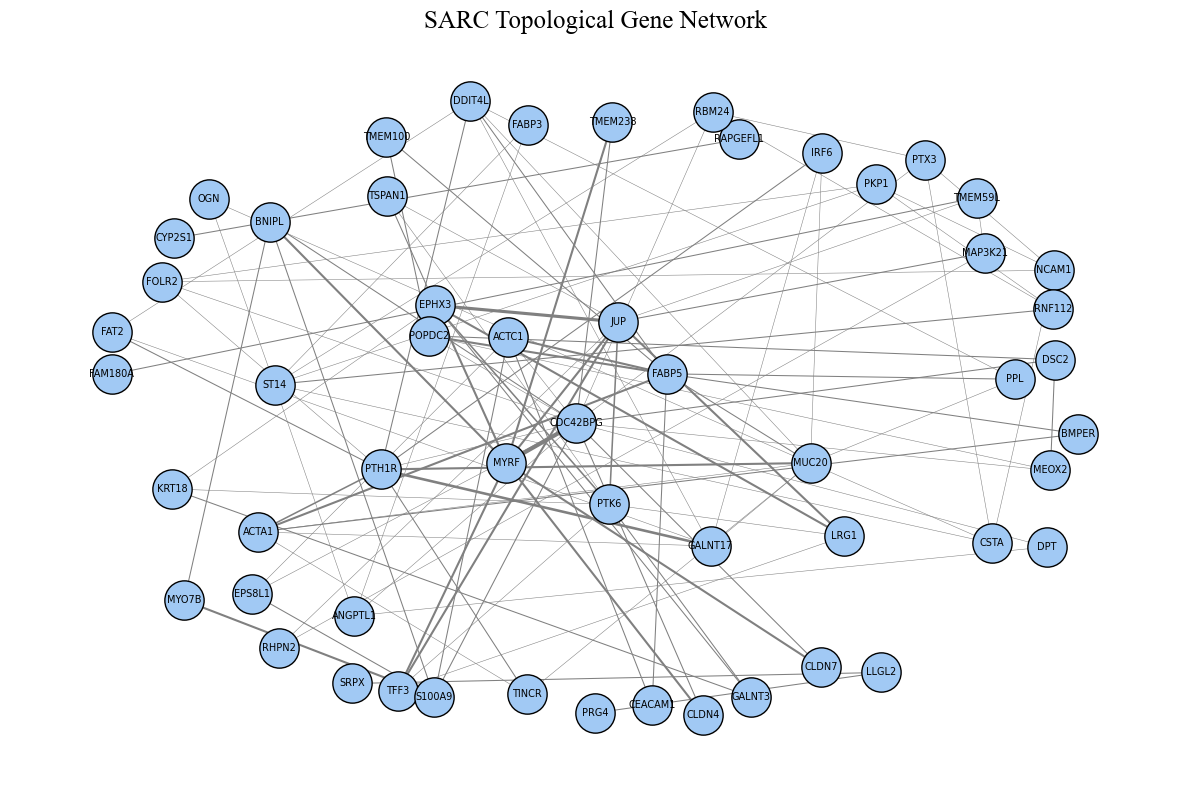

Plot saved successfully to ../plots/networks/esca_network at 600 DPI.


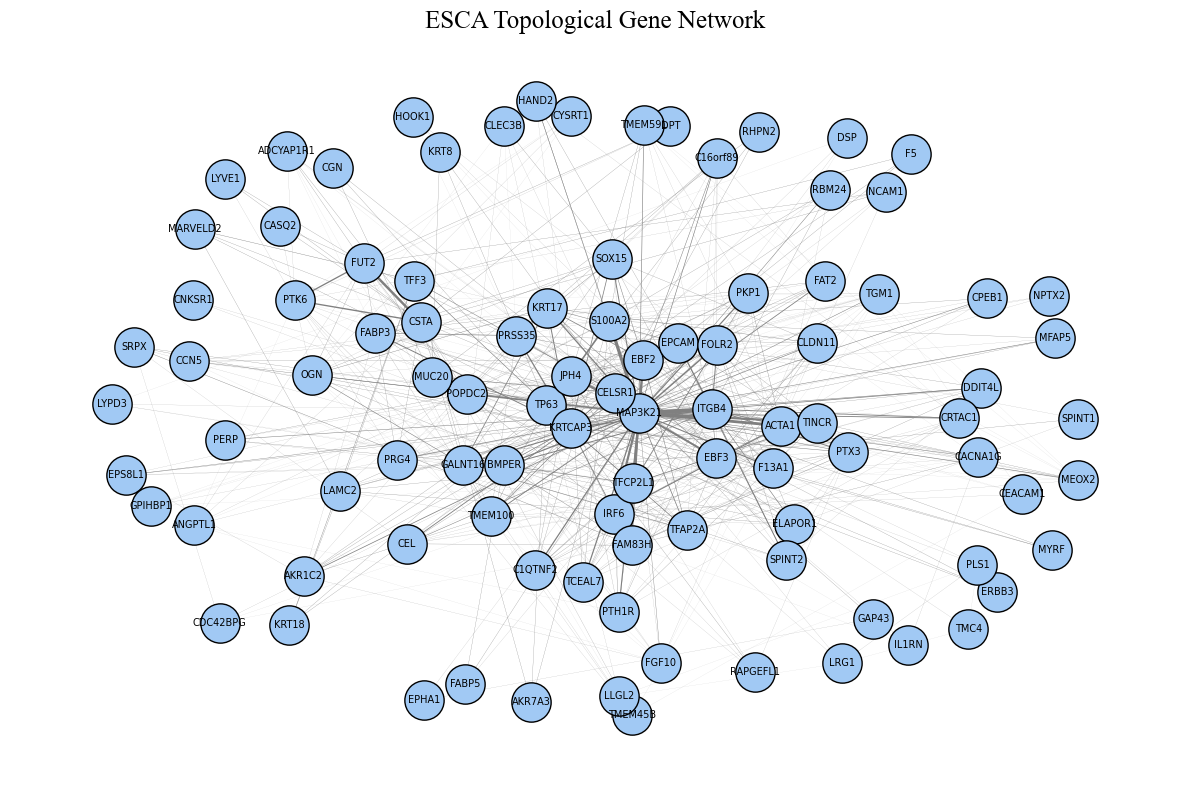

Plot saved successfully to ../plots/networks/pcpg_network at 600 DPI.


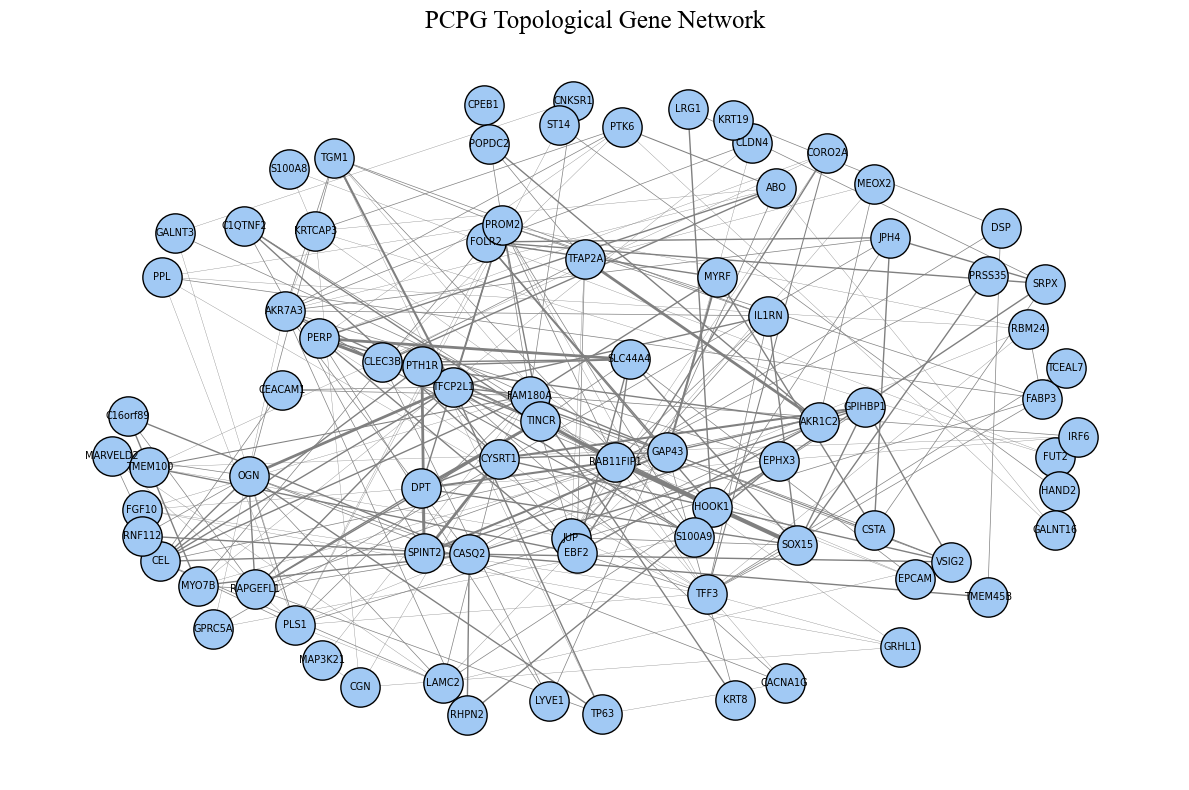

In [5]:
set_plot_fonts()
plot_gene_network(df=sarc_interactions_filtered, save_path="../plots/networks/sarc_network",title="SARC Topological Gene Network", scale_factor=3)
plot_gene_network(df=esca_interactions_filtered, save_path="../plots/networks/esca_network",title="ESCA Topological Gene Network")
plot_gene_network(df=pcpg_interactions_filtered, save_path="../plots/networks/pcpg_network", title="PCPG Topological Gene Network")

In [6]:
#plot_gene_network_interactive(persistent_holes, geneset_col='geneset', output_file='../../index.html')
plot_gene_network_interactive2(persistent_holes, geneset_col='geneset', output_file='../../resistant.html')
plot_gene_network_interactive2(persistent_holes, geneset_col='geneset', output_file='../../sensitive.html')

NameError: name 'persistent_holes' is not defined

In [ ]:
from pyvis.network import Network

# Initialize network with CDN resources set to inline
net = Network(notebook=True, cdn_resources="in_line")
net.add_node("A", label="Node A")
net.add_node("B", label="Node B")
net.add_edge("A", "B")

# Save and display the network
net.show("simple_network.html")


simple_network.html
